# Progetto di *Foundations of Probability and Statistics*


Bagnasco Anna (887001), Grosso Silvia (881993), Merelli Elisa (881427)

## Introduzione

L’obiettivo di questo elaborato è quello di indagare, in un primo momento, la natura delle variabili contenute nel dataset Spotify attraverso un’analisi descrittiva e, successivamente, sviluppare un modello volto a spiegare l’attributo *popularity* scelto come variabile target.

In [1]:
rm(list = ls())

spotify<-read.csv("https://raw.githubusercontent.com/cs582/Data_Analysis_on_Spotify_2020/master/data_by_genres.csv", header=T)
spotify

genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
432hz,0.49478000,0.2993333,1048887.3,0.4506783,4.777617e-01,0.13100000,-16.854000,0.07681667,120.2857,0.2217500,52.166667,5,1
[],0.67924474,0.5214733,229852.6,0.4015221,1.967373e-01,0.22158621,-12.679076,0.11226708,112.0252,0.5159200,21.682005,7,1
a cappella,0.62153172,0.5770169,193652.2,0.3456941,3.798922e-03,0.12708682,-12.770211,0.09532427,111.8132,0.4531856,43.351819,11,1
abstract,0.35939500,0.4595000,343018.5,0.4870000,7.914000e-01,0.11948000,-14.092000,0.04342000,124.7432,0.3049900,41.500000,1,1
abstract beats,0.35334667,0.6944000,233824.4,0.6134000,3.494026e-01,0.10245333,-6.699800,0.14345333,119.3984,0.6341867,58.600000,10,0
abstract hip hop,0.20587199,0.7231316,249095.1,0.6454608,2.852672e-03,0.16803175,-7.216007,0.25010439,112.1603,0.5843918,43.804971,11,1
accordeon,0.80133333,0.6263333,162613.3,0.3090000,6.160000e-01,0.25266667,-10.736667,0.03573333,114.5220,0.5436667,28.666667,2,1
accordion,0.48620833,0.6408333,166508.2,0.3640000,1.113173e-01,0.18697500,-14.436542,0.08277500,112.7222,0.6439167,15.208333,2,1
acid house,0.05700233,0.6842278,293609.3,0.7214189,3.202194e-01,0.23238111,-10.378311,0.05850944,123.1759,0.6222056,44.566667,11,1
acid jazz,0.15541400,0.7142000,284362.4,0.6946667,1.906131e-01,0.10680000,-10.234667,0.05202000,112.2434,0.7893667,44.033333,6,1


Il dataset Spotify considerato contiene 2664 righe e 14 colonne che descrivono per ogni genere musicale alcune caratteristiche dei vari generi.

- _**Acousticness**_ : rappresenta l’acusticità di un genere e i suoi valori variano tra 0.0 a 1.0, dove 1 corrisponde alla massima acusticità del genere;


- _**Danceability**_ : indica quanto un genere sia adatto ad essere ballato. Un valore di 0.0 è il meno ballabile e 1.0 è il più ballabile;


- _**Duration_ms**_ : la durata media della traccia associata al genere in millisecondi;


- _**Energy**_ : l'energia è una misura da 0.0 a 1.0 e rappresenta una misura percettiva dell'intensità e dell'attività. In genere, le tracce energiche sono veloci e rumorose;


- _**Instrumentalness**_ : rappresenta il livello di strumentalità presente nel genere. Più il valore è vicino a 1.0, maggiore è la probabilità che la traccia non contenga contenuti vocali;


- _**Key**_ : la tonalità in cui si trova la traccia. I numeri interi vengono mappati sulle altezze utilizzando la notazione standard della classe di tonalità. Per esempio. 0 = Do, 1 = Do♯/Re♭, 2 = Re e così via;


- _**Liveness**_ : rileva la presenza di un pubblico nella registrazione. Valori di liveness più elevati rappresentano una maggiore probabilità che la traccia sia stata eseguita dal vivo;


- _**Loudness**_ : il volume complessivo di una traccia in decibel (dB). I valori sono compresi tra -60 e 0 dB;


- _**Mode**_ : è una variabile binaria in cui 1 rappresenta l’utilizzo di una scala maggiore e 0 di una scala minore;


- _**Popularity**_ : la popolarità del genere. Il valore è compreso tra 0 e 100, dove 100 è il valore associato al massimo livello di popolarità;


- _**Speechiness**_ : rileva la presenza di parole pronunciate in una traccia. Più la registrazione è esclusivamente vocale (ad esempio talk show, audiolibro, poesia) più vicino a 1.0 è il valore dell'attributo;


- _**Tempo**_ : rappresenta i BPM del genere;


- _**Valence**_ : una misura da 0.0 a 1.0 che descrive la positività musicale trasmessa da una traccia. I brani con valenza alta suonano più positivi (es. allegri, euforici), mentre i brani con valenza bassa suonano più negativi (es. tristi, arrabbiati).

## Analisi descrittiva

Iniziamo l’esplorazione dei dati con i seguenti comandi:

In [2]:
#install.packages('Hmisc')
#install.packages('dplyr')
#install.packages('ellipse')
#install.packages('corrplot')

In [3]:
#importiamo le librerie
library(Hmisc) 
library(dplyr)
library(ellipse)
library(corrplot)

Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:Hmisc':

    src, summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ellipse' was built under R version 3.6.3"
Attaching package: 'ellipse'

The following object is masked from 'package:graphics':

    pairs

corrplot 0.92 loaded


In [4]:
str(spotify)

'data.frame':	2664 obs. of  14 variables:
 $ genres          : Factor w/ 2664 levels "[]","432hz","a cappella",..: 2 1 3 4 5 6 7 8 9 10 ...
 $ acousticness    : num  0.495 0.679 0.622 0.359 0.353 ...
 $ danceability    : num  0.299 0.521 0.577 0.46 0.694 ...
 $ duration_ms     : num  1048887 229853 193652 343019 233824 ...
 $ energy          : num  0.451 0.402 0.346 0.487 0.613 ...
 $ instrumentalness: num  0.4778 0.1967 0.0038 0.7914 0.3494 ...
 $ liveness        : num  0.131 0.222 0.127 0.119 0.102 ...
 $ loudness        : num  -16.9 -12.7 -12.8 -14.1 -6.7 ...
 $ speechiness     : num  0.0768 0.1123 0.0953 0.0434 0.1435 ...
 $ tempo           : num  120 112 112 125 119 ...
 $ valence         : num  0.222 0.516 0.453 0.305 0.634 ...
 $ popularity      : num  52.2 21.7 43.4 41.5 58.6 ...
 $ key             : int  5 7 11 1 10 11 2 2 11 6 ...
 $ mode            : int  1 1 1 1 0 1 1 1 1 1 ...


In [5]:
summary(spotify)

              genres      acousticness        danceability    
 []              :   1   Min.   :0.0000033   Min.   :0.05985  
 432hz           :   1   1st Qu.:0.1200519   1st Qu.:0.44585  
 a cappella      :   1   Median :0.3196123   Median :0.54478  
 abstract        :   1   Mean   :0.3990600   Mean   :0.53655  
 abstract beats  :   1   3rd Qu.:0.6578291   3rd Qu.:0.64312  
 abstract hip hop:   1   Max.   :0.9960000   Max.   :0.95733  
 (Other)         :2658                                        
  duration_ms          energy         instrumentalness      liveness     
 Min.   :  30946   Min.   :0.002825   Min.   :0.000000   Min.   :0.0222  
 1st Qu.: 205414   1st Qu.:0.403441   1st Qu.:0.005402   1st Qu.:0.1448  
 Median : 237096   Median :0.600476   Median :0.077899   Median :0.1800  
 Mean   : 249383   Mean   :0.564704   Mean   :0.200024   Mean   :0.1939  
 3rd Qu.: 272314   3rd Qu.:0.733009   3rd Qu.:0.320169   3rd Qu.:0.2203  
 Max.   :1644773   Max.   :0.999500   Max.   :0.9920

Osserviamo ora l’assenza di valori mancanti:

In [6]:
sum(rowSums(is.na(spotify)))

[1] 0

Per facilitare l’interpretazione della variabile di durata, convertiamo l’unità di misura da millisecondi a minuti:


In [7]:
spotify$duration_ms <- round(spotify$duration_ms/60000, digits = 2)
colnames(spotify)[4] <- 'duration_min'

Valutiamo ora attraverso istogrammi e boxplot la distribuzione di ogni variabile:

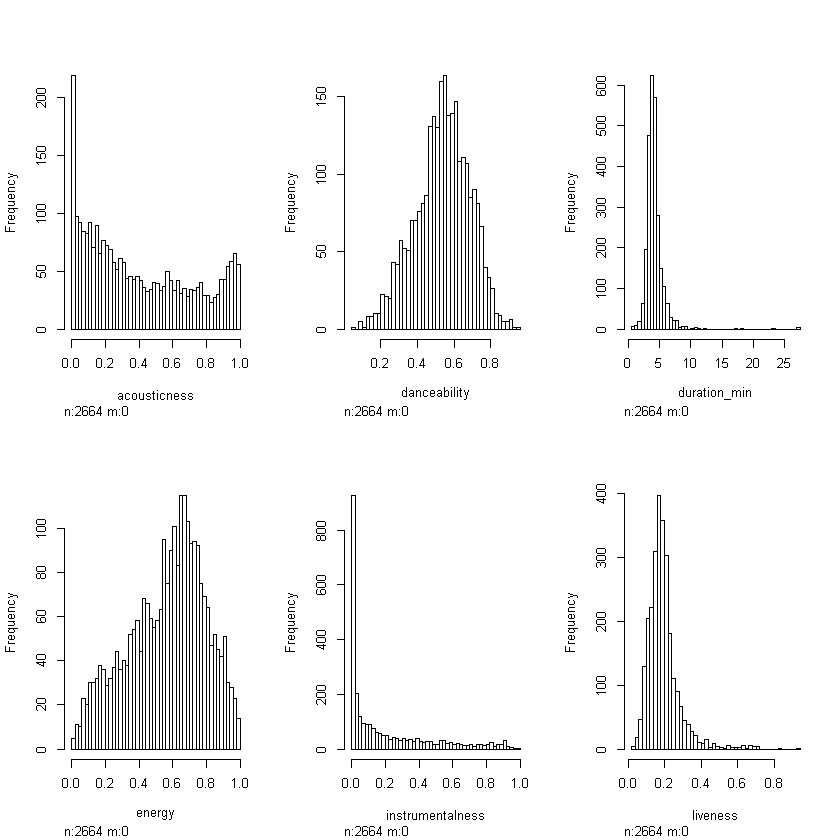

In [8]:
hist.data.frame(spotify[2:7])

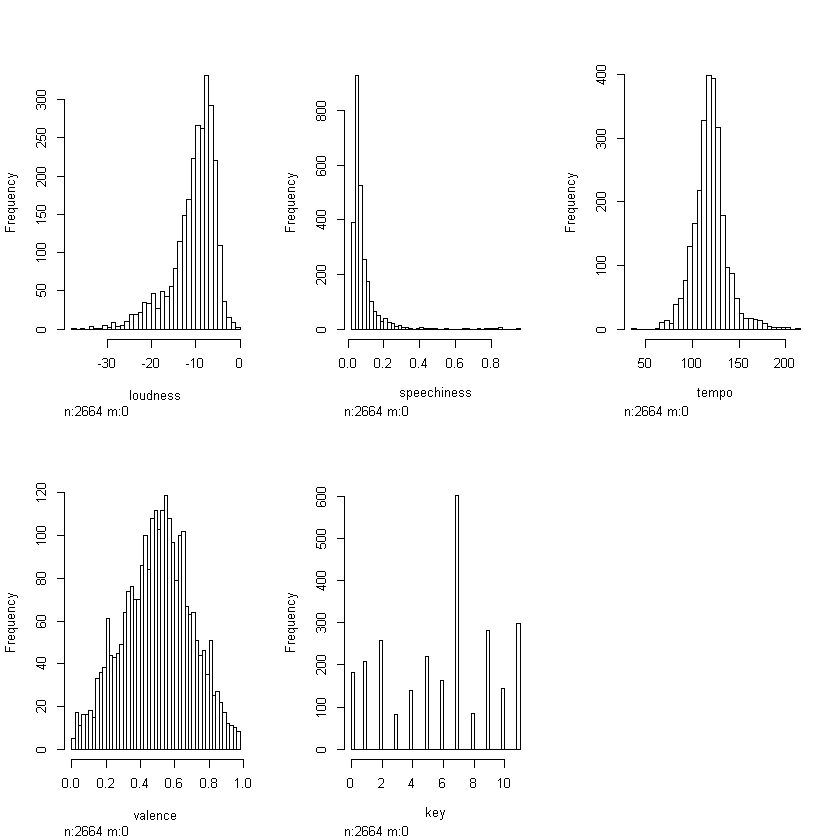

In [9]:
hist.data.frame(spotify[, c(8,9,10,11,13)])

In [10]:
length(spotify$mode[spotify$mode==0])
length(spotify$mode[spotify$mode==1])

[1] 418

[1] 2246

La variabile *Loudness* presenta una coda più pronunciata in corrispondenza di valori bassi.
La variabile *Valence* presenta una distribuzione simmetrica rispetto al valore medio 0.5.
Infine analizzando la frequenza delle variabili *Key* e *Mode*, osserviamo una maggiore rappresentatività nel campione di generi in chiave Sol (associato al numero 7) e scala maggiore.

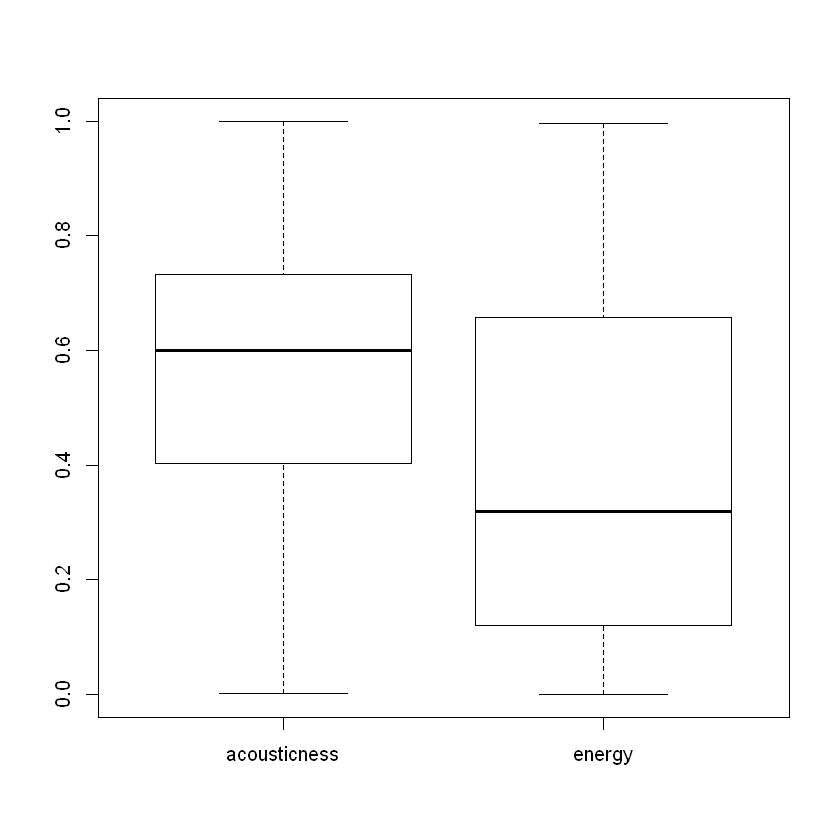

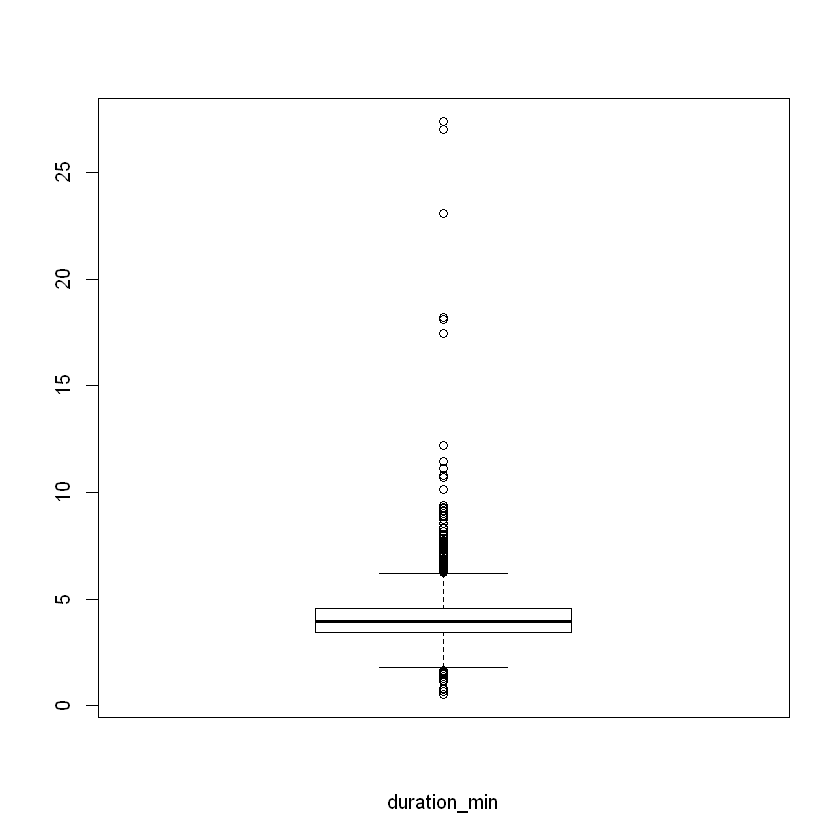

In [11]:
boxplot(spotify$energy, spotify$acousticness, names= c('acousticness','energy'))
    boxplot(spotify$duration_min, xlab= 'duration_min')

La variabile *Energy* non presenta outliers e ha un’ampia variabilità.
Come si osserva dall’istogramma relativo alla variabile *duration_min*, la maggior parte dei generi presenti nel campione hanno una durata che si aggira intorno ai 4 minuti, nonostante la presenza di diversi outliers e un valore massimo di 27 minuti visibili nel relativo boxplot.
Dall’istogramma associato ad *Acousticness* si evince che la variabile presenta un picco intorno al valore 0 e come si osserva anche dal boxplot vi è un’ampia variabilità dei valori.

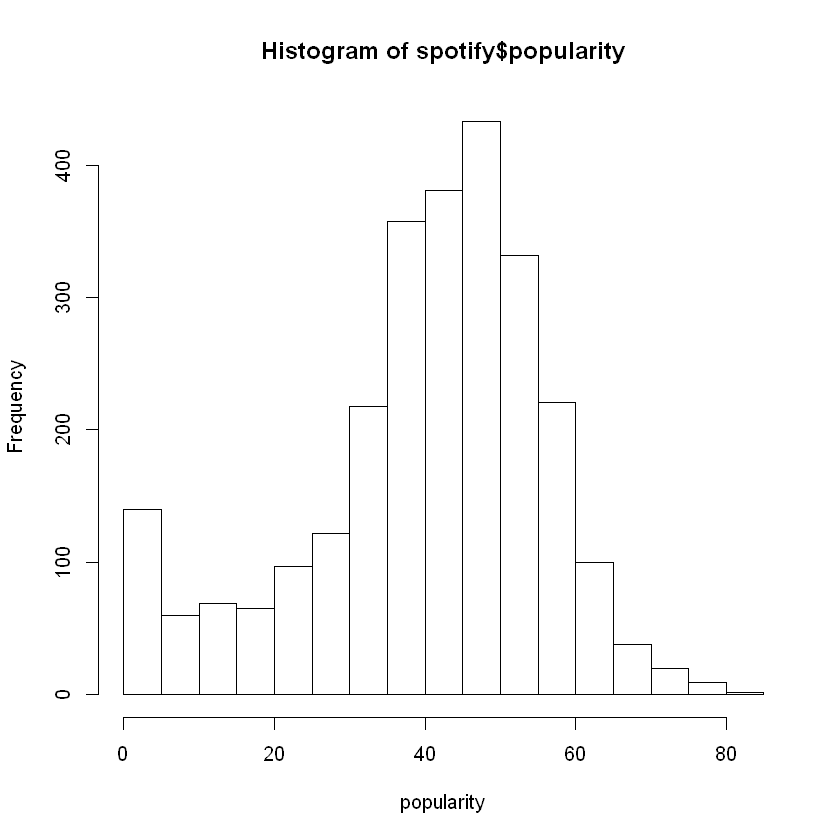

In [12]:
hist(spotify$popularity, xlab= 'popularity')

Osserviamo che la variabile *Popularity*, tralasciando la frequenza dei valori vicini allo 0, ha una distribuzione che può essere approssimata a una normale attorno al valor medio 40: come si evince dalla summary del dataset svolta precedentemente, i suoi valori variano tra un minimo di 0 e un massimo di 82.

Analizziamo ora le eventuali correlazioni tra le variabili esplicative e con la variabile target.

In [14]:
round(cor(spotify[,-1]),2)

,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
acousticness,1.00,-0.30,0.01,-0.87,0.27,-0.04,-0.73,-0.05,-0.39,-0.16,-0.58,-0.07,0.05
danceability,-0.30,1.00,-0.16,0.27,-0.41,-0.10,0.43,0.24,0.06,0.66,0.27,-0.01,-0.05
duration_min,0.01,-0.16,1.00,-0.10,0.21,0.00,-0.19,0.03,-0.06,-0.26,0.01,-0.01,-0.03
energy,-0.87,0.27,-0.10,1.00,-0.31,0.13,0.85,0.08,0.44,0.29,0.45,0.09,-0.05
instrumentalness,0.27,-0.41,0.21,-0.31,1.00,-0.04,-0.52,-0.20,-0.20,-0.38,-0.21,-0.04,-0.01
liveness,-0.04,-0.10,0.00,0.13,-0.04,1.00,0.08,0.18,0.04,-0.01,-0.10,0.00,0.04
loudness,-0.73,0.43,-0.19,0.85,-0.52,0.08,1.00,0.06,0.43,0.36,0.44,0.08,-0.03
speechiness,-0.05,0.24,0.03,0.08,-0.20,0.18,0.06,1.00,0.01,0.10,-0.06,-0.02,-0.01
tempo,-0.39,0.06,-0.06,0.44,-0.20,0.04,0.43,0.01,1.00,0.14,0.17,0.06,-0.04
valence,-0.16,0.66,-0.26,0.29,-0.38,-0.01,0.36,0.10,0.14,1.00,-0.04,0.05,0.00


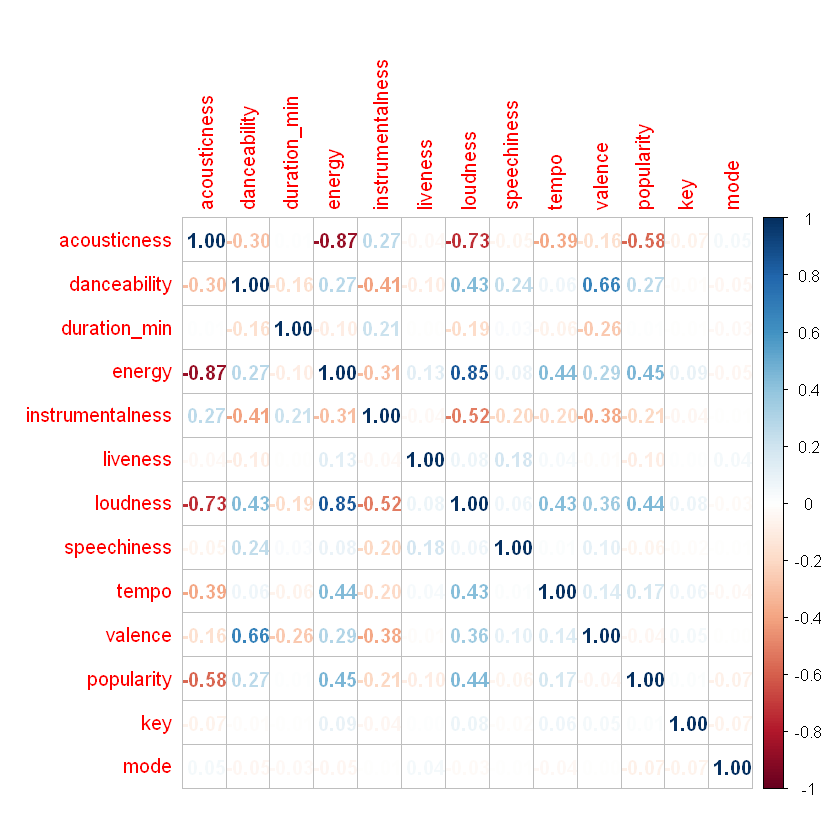

In [15]:
corrplot(cor(spotify[,-1]), method = 'number')

Osserviamo che la variabile *acousticness* è correlata negativamente con le variabili *loudness* (-0.73) ed *energy* (-0.87) : si può infatti supporre che generi musicali più acustici abbiano mediamente un volume più basso e siano meno energiche in termini di velocità e intensità. Come previsto inoltre le variabili *loudness* ed *energy* sono fortemente correlate tra loro (0.85).
Osserviamo infine una correlazione positiva tra le variabili *valence* e *danceability* (0.66): questo può essere conseguenza del fatto che generi che trasmettono un’alta positività suscitino una voglia maggiore di ballare.

Per quanto riguarda le correlazioni con la variabile target *popularity*, gli attributi più fortemente correlati sono *acousticness* (-0.58), e *energy* (0.45).

Terremo conto di questi aspetti nella formulazione del nostro modello di regressione.

Osservando la matrice di correlazione, appuriamo la presenza di un valore basso di correlazioni tra variabili che abbiamo ipotizzato potessero essere correlate.
La correlazione tra le variabili *energy* e *tempo* ha un valore di 0.44. Dal momento che una traccia è considerata energica se più veloce e rumorosa e la variabile tempo è associata ai BPM, intuitivamente questa correlazione dovrebbe essere più marcata.
Allo stesso modo, poichè la variabile *instrumentalness* corrisponde al livello di strumentalità del genere, abbiamo ipotizzato che questa variabile potesse avere un’alta correlazione negativa con la variabile *speechiness*. A differenza di quanto ipotizzato, il valore che abbiamo osservato è di -0.2.

Per quanto riguarda il rapporto che intercorre tra la variabile *liveness* e *spechiness*, abbiamo inizialmente supposto che fossero più frequenti registrazioni live di generi con un alto numero di parole nella traccia. Tuttavia, analizzando il valore della correlazione (0.18), abbiamo rivalutato la nostra considerazione immaginando che durante le performances dal vivo siano presenti momenti inediti non presenti nelle registrazioni in studio (si pensi ad esempio agli assoli).

Abbiamo infine ipotizzato che la durata dei generi potesse influenzare negativamente  il livello di ballabilità: tuttavia la correlazione risulta essere -0.16. Oltre al fatto che quest’interpretazione potrebbe essere superficiale, tale aspetto può essere causato 
anche dal fatto che la variabile associata alla durata presenta molti outliers, come si può notare anche dal boxplot relativo visualizzato precedentemente.

Per accertarci che la presenza di valori anomali nelle variabili non stessero influenzando i risultati ottenuti finora, abbiamo ripetuto le analisi rimuovendo gli outliers degli attributi *Duration_min*, *Spechiness* e *Tempo*. Non abbiamo tuttavia riscontrato alcuna differenza significativa nella matrice di correlazione; per questa ragione decidiamo di proseguire con i dati originali.

## Analisi inferenziale

Dopo un’analisi preliminare dei dati, passiamo alla costruzione del modello di regressione lineare volto ad approssimare la variabile target *popularity*.

Procediamo con la modellazione attraverso il metodo forward. Formuliamo quindi il modello lineare semplice utilizzando la variabile esplicativa *acousticness*, la più correlata (negativamente) alla variabile target.

In [17]:
attach(spotify)
lm1_a <- lm(popularity~acousticness)
summary(lm1_a)


Call:
lm(formula = popularity ~ acousticness)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.876  -8.359  -0.112   8.286  51.997 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   51.8779     0.4099   126.6   <2e-16 ***
acousticness -29.4664     0.8073   -36.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.08 on 2662 degrees of freedom
Multiple R-squared:  0.3335,	Adjusted R-squared:  0.3333 
F-statistic:  1332 on 1 and 2662 DF,  p-value: < 2.2e-16


Analizzando l’output del modello si osserva che il coefficiente di determinazione $R^{2}$ indica che il 33% della variabilità totale è spiegata dalla relazione lineare considerata. Inoltre, l’intercetta e il coefficiente di regressione associato alla variabile esplicativa *Acousticness* risultano significativamente diversi da zero.

Visualizziamo il diagramma di dispersione aggiungendo anche la retta di regressione stimata:

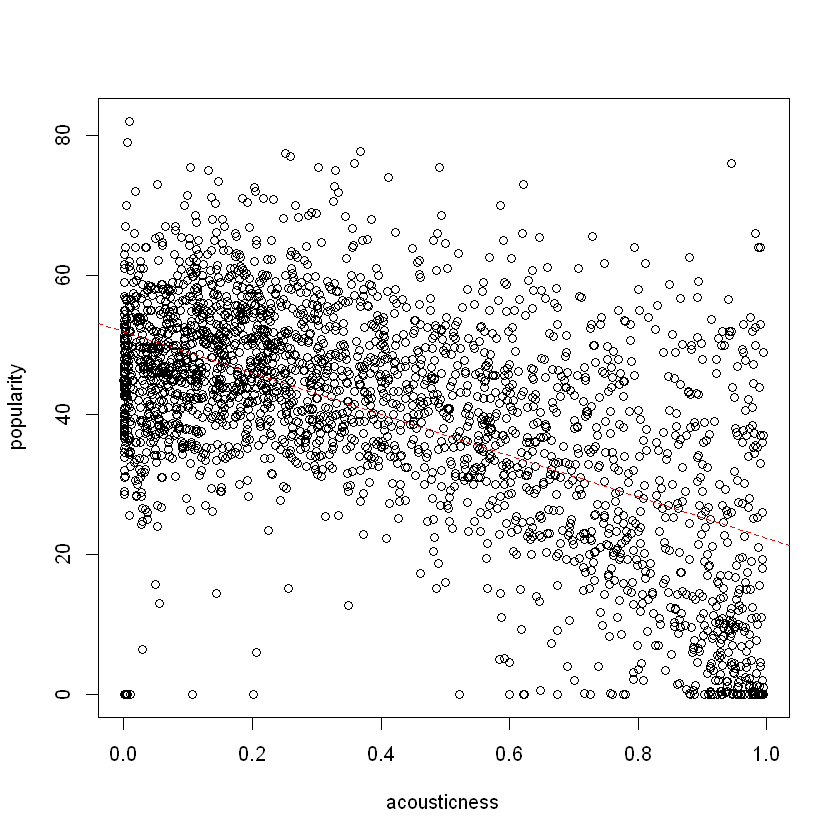

In [18]:
plot(popularity~acousticness)
abline(coef(lm1_a), col= 'red', lty = 2 )

Controlliamo l’andamento dei residui tramite un’analisi grafica:

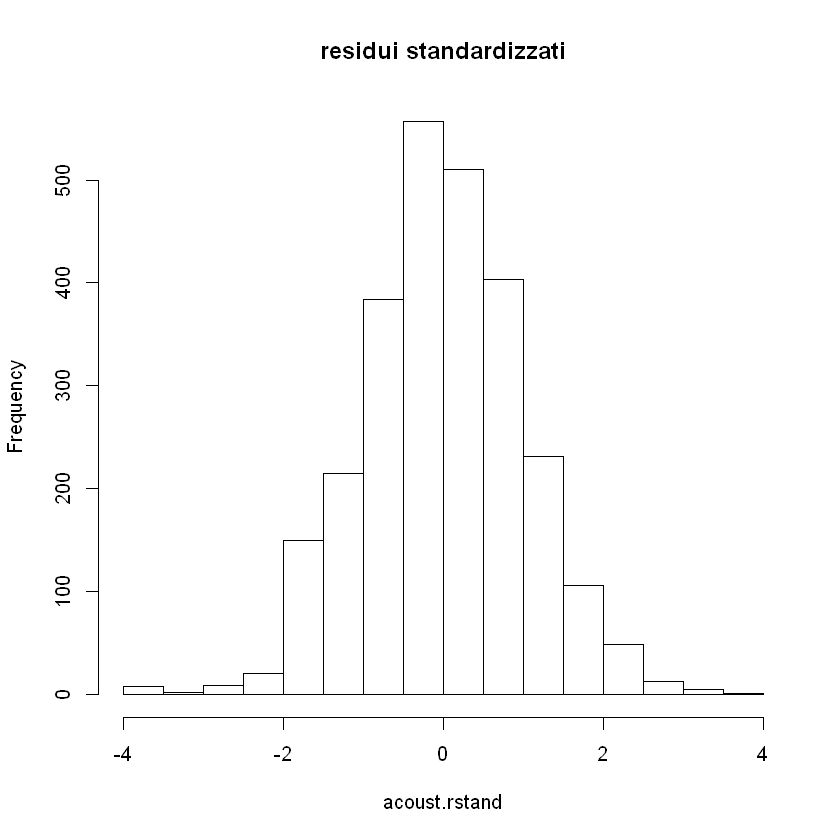

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.968100 -0.639270 -0.008542 -0.000045  0.633693  3.978437 

[1] 1.000521

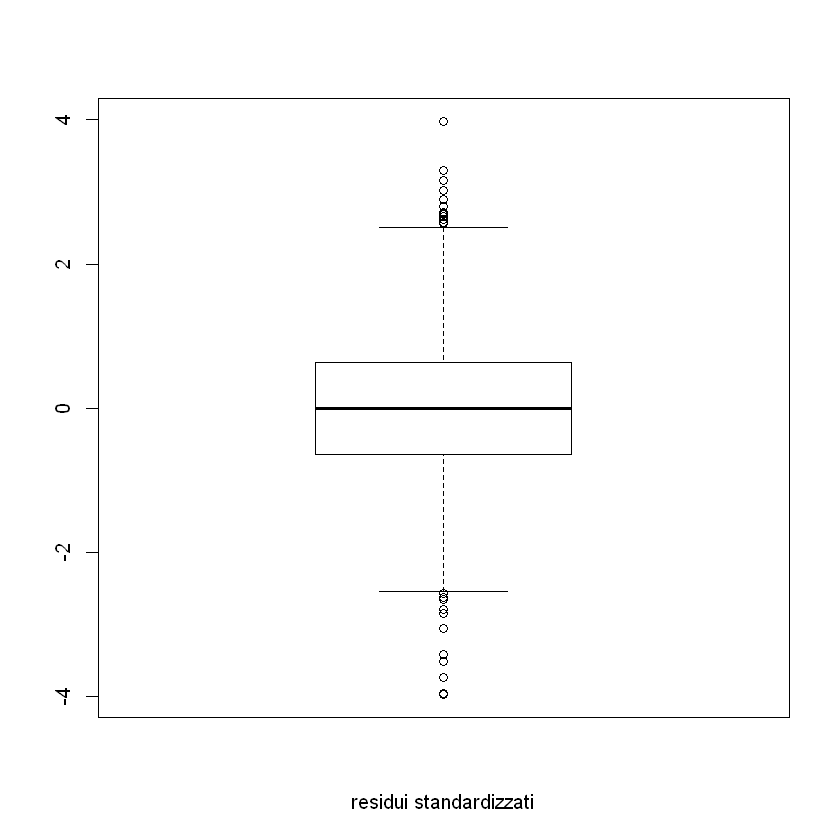

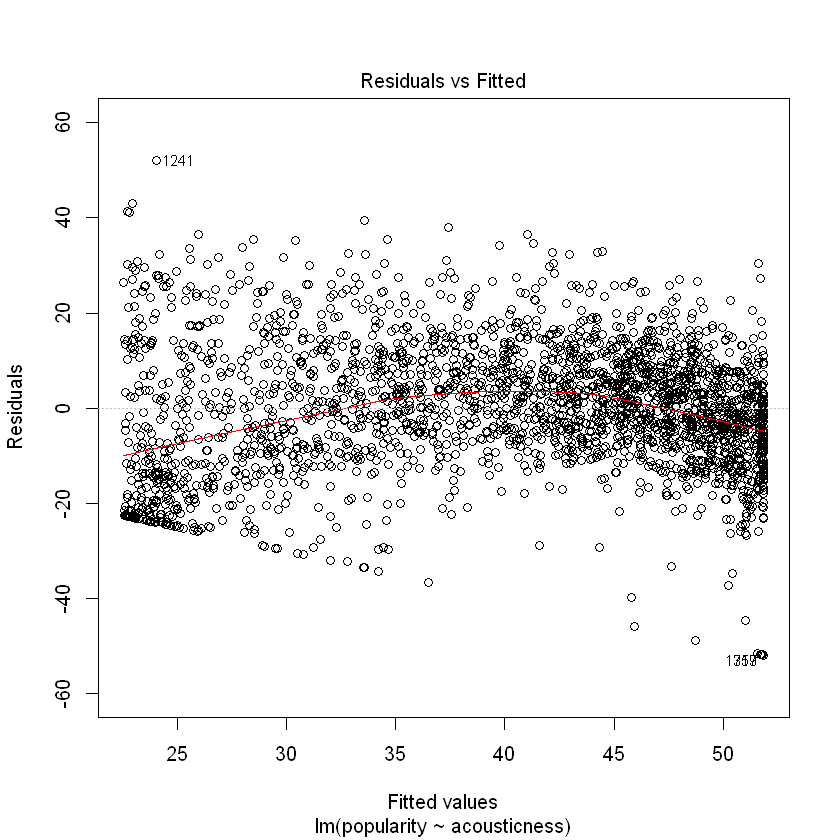

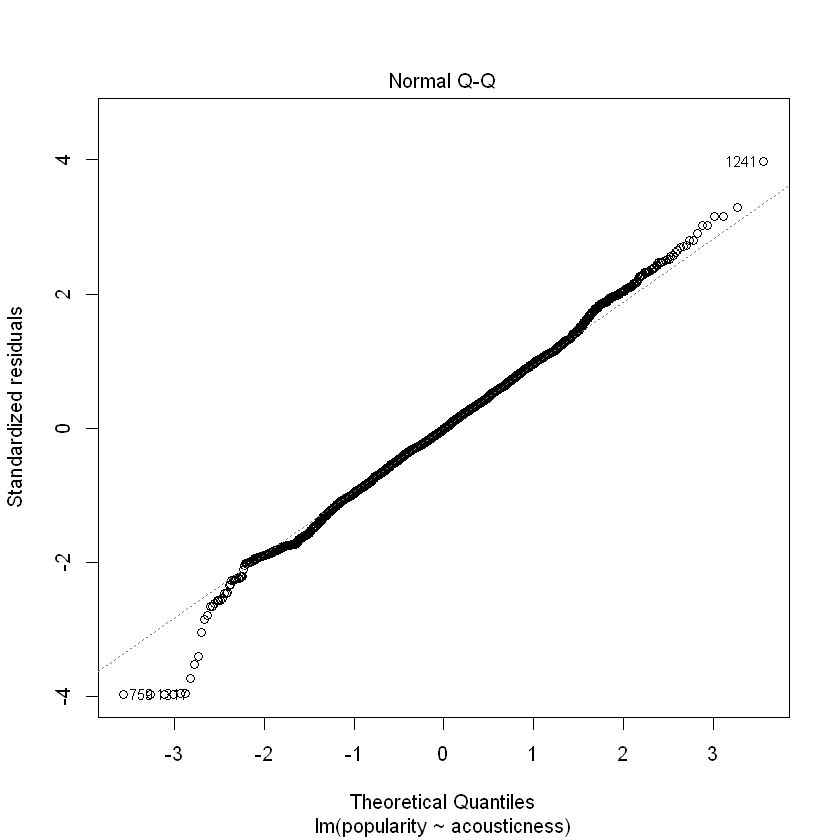

In [19]:
acoust.rstand <- rstandard(lm1_a)
hist(acoust.rstand,main= 'residui standardizzati')
boxplot(acoust.rstand, xlab = 'residui standardizzati') 
summary(acoust.rstand) 
var(acoust.rstand) 
par(mfrow=c(1,1))
plot(lm1_a,which=c(1,2))
par(mfrow=c(1,2))

Osserviamo la normalità della distribuzione degli errori standardizzati attraverso l’istogramma e il boxplot. Tuttavia il diagramma di dispersione dei residui mostra un andamento parabolico che potrebbe suggerire una relazione di tipo quadratico: in particolare agli estremi del campo di variazione della variabile esplicativa *Acousticness* i valori della variabile risposta sono sovrastimati, mentre per i valori centrali la risposta risulta sottostimata.
Il diagramma quantile dei residui standardizzati suggerisce altresì una asimmetria nella distribuzione degli errori.

Proviamo quindi a migliorare il modello aggiungendo il termine quadratico di *Acousticness* come variabile esplicativa.


In [20]:
lm1_apoli <- lm(popularity ~ acousticness + I(acousticness^2))
summary(lm1_apoli)


Call:
lm(formula = popularity ~ acousticness + I(acousticness^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-47.430  -8.417  -0.581   7.525  57.838 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        46.2672     0.5275  87.719  < 2e-16 ***
acousticness       15.3849     2.9264   5.257 1.58e-07 ***
I(acousticness^2) -47.6681     3.0001 -15.889  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.5 on 2661 degrees of freedom
Multiple R-squared:  0.3913,	Adjusted R-squared:  0.3908 
F-statistic: 855.2 on 2 and 2661 DF,  p-value: < 2.2e-16


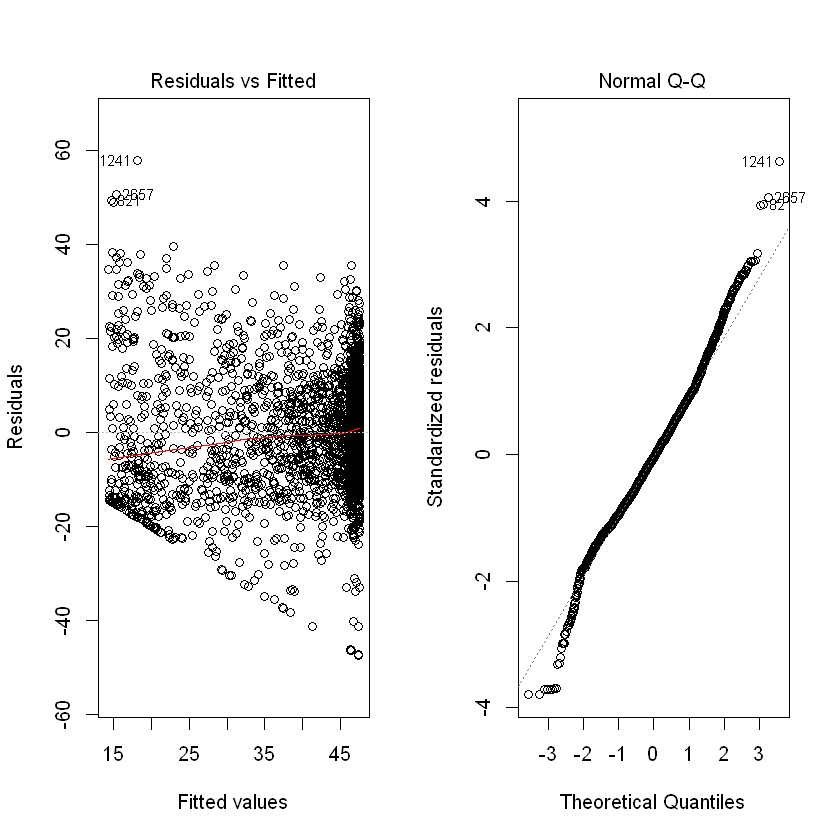

In [21]:
par(mfrow=c(1,2))
plot(lm1_apoli,which=c(1,2))
par(mfrow=c(1,1))

I coefficienti di regressione risultano ancora tutti significativamente diversi da zero, e si osserva un valore di $R^{2}$  maggiore, pari a 0.39.
Dal grafico di dispersione dei residui standardizzati osserviamo che la linea di tendenza è stata leggermente corretta rispetto a prima.

Esaminiamo il modello lineare semplice con la variabile *Energy*, la seconda più correlata alla variabile target:

In [22]:
lm1_e <- lm(popularity~energy)
summary(lm1_e)


Call:
lm(formula = popularity ~ energy)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.073  -8.500   0.699   9.616  48.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.1141     0.7407   29.86   <2e-16 ***
energy       31.8839     1.2167   26.21   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.28 on 2662 degrees of freedom
Multiple R-squared:  0.2051,	Adjusted R-squared:  0.2048 
F-statistic: 686.8 on 1 and 2662 DF,  p-value: < 2.2e-16


Nonostante i livelli di significatività dei coefficienti di regressione ancora elevati, osserviamo un significativo peggioramento del valore di $R^{2}$ che ora spiega il 20% dei dati.
Anche in questo caso il grafico di dispersione dei residui standardizzati suggeriva una relazione di tipo quadratico tra le variabili, ma considerando nuovamente il corrispettivo modello polinomiale con l’introduzione del fattore quadratico di *Energy*, non abbiamo ottenuto un miglioramento rilevante. Scegliamo quindi di migliorare il modello lineare di tipo polinomiale che considera la variabile esplicativa *Acousticness*.

Aggiungiamo separatamente al modello le successive tre variabili con correlazione più alta con la variabile target: *Energy*, *Loudness* e *Danceability*; tale scelta è operata consapevolmente al fatto che vi è una marcata dipendenza lineare tra le variabili esplicative *Energy* e *Acousticness* e di conseguenza che vi è un rischio di multicollinearità.

In [23]:
lm2_e <- update(lm1_apoli, .~.+ energy)
summary(lm2_e)
lm2_l <- update(lm1_apoli, .~.+ loudness)
summary(lm2_l)
lm2_d <- update(lm1_apoli, .~.+ danceability)
summary(lm2_d)


Call:
lm(formula = popularity ~ acousticness + I(acousticness^2) + 
    energy)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.195  -8.284  -0.396   7.450  56.989 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         57.193      1.814  31.537  < 2e-16 ***
acousticness         6.818      3.209   2.125   0.0337 *  
I(acousticness^2)  -47.497      2.979 -15.946  < 2e-16 ***
energy             -13.372      2.125  -6.293 3.64e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.41 on 2660 degrees of freedom
Multiple R-squared:  0.4002,	Adjusted R-squared:  0.3995 
F-statistic: 591.6 on 3 and 2660 DF,  p-value: < 2.2e-16



Call:
lm(formula = popularity ~ acousticness + I(acousticness^2) + 
    loudness)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.934  -8.587  -0.581   7.591  58.325 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        45.30019    0.72492  62.490  < 2e-16 ***
acousticness       14.95839    2.93305   5.100 3.64e-07 ***
I(acousticness^2) -48.97860    3.07337 -15.936  < 2e-16 ***
loudness           -0.14215    0.07314  -1.944   0.0521 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.5 on 2660 degrees of freedom
Multiple R-squared:  0.3921,	Adjusted R-squared:  0.3915 
F-statistic:   572 on 3 and 2660 DF,  p-value: < 2.2e-16



Call:
lm(formula = popularity ~ acousticness + I(acousticness^2) + 
    danceability)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.503  -8.339  -0.569   7.452  56.418 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         44.560      1.085  41.062  < 2e-16 ***
acousticness        14.148      3.005   4.709 2.62e-06 ***
I(acousticness^2)  -45.871      3.161 -14.513  < 2e-16 ***
danceability         3.239      1.799   1.800   0.0719 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.5 on 2660 degrees of freedom
Multiple R-squared:  0.392,	Adjusted R-squared:  0.3913 
F-statistic: 571.7 on 3 and 2660 DF,  p-value: < 2.2e-16


Si osserva che i coefficienti di regressione *Loudness* e *Danceability* perdono di significatività nei corrispettivi modelli. Inoltre, come previsto, l’introduzione della variabile *Energy* ha ridotto la significatività del coefficiente associato alla variabile *Acousticness*.

Confrontiamo quindi le coppie di modelli annidati tramite il test anova:

In [24]:
anova(lm1_apoli, lm2_e)
anova(lm1_apoli, lm2_l)
anova(lm1_apoli, lm2_d)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2661,415946.9,NA,NA,NA,NA
2660,409845.9,1,6100.999,39.59698,3.638565e-10


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2661,415946.9,NA,NA,NA,NA
2660,415357.1,1,589.8145,3.777248,0.05205939


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2661,415946.9,NA,NA,NA,NA
2660,415440.6,1,506.2312,3.241318,0.07191612


Si sceglie il modello che considera la variabile *Energy*, per cui la somma dei quadrati dei residui (RSS) è più bassa o equivalentemente la somma dei quadrati di regressione spiegata (Sum of Sq) e il valore F sono più alti.

Poiché la spiegabilità del modello non risulta ancora soddisfacente, valutiamo di aggiungere al modello la variabile esplicativa *Loudness*. Prima di procedere con l’introduzione di *Loudness* verifichiamo il tipo di relazione che intercorre con la variabile target, analizzando il modello lineare semplice associato e il relativo grafico di dispersione dei residui standardizzati.

In [25]:
lm1_l <- lm(popularity~loudness)
summary(lm1_l)


Call:
lm(formula = popularity ~ loudness)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.911  -6.532   1.187   8.906  59.945 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 54.76538    0.64275   85.20   <2e-16 ***
loudness     1.41147    0.05581   25.29   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.39 on 2662 degrees of freedom
Multiple R-squared:  0.1937,	Adjusted R-squared:  0.1934 
F-statistic: 639.5 on 1 and 2662 DF,  p-value: < 2.2e-16


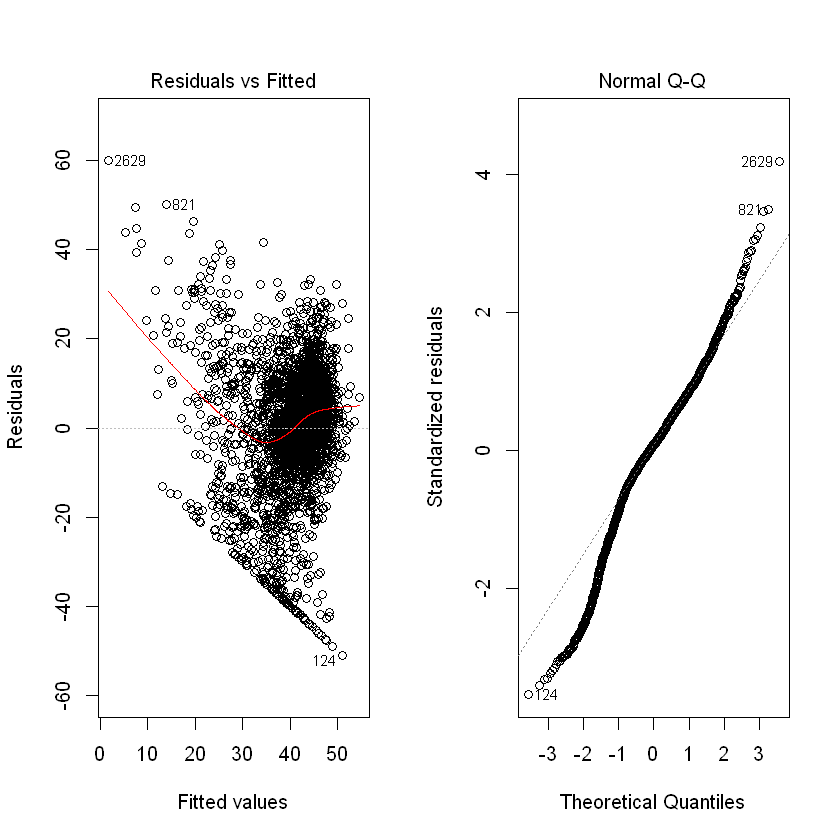

In [26]:
par(mfrow=c(1,2))
plot(lm1_l,which=c(1,2))
par(mfrow=c(1,1))

Anche in questo caso si ipotizza una relazione di tipo quadratico tra le variabili, dunque introduciamo il termine quadratico di *Loudness* e notiamo il miglioramento del valore di $R^{2}$ e del grafico dei residui standardizzati.

In [27]:
lm1_lpoli <- lm(popularity ~ loudness + I(loudness^2))
summary(lm1_lpoli)


Call:
lm(formula = popularity ~ loudness + I(loudness^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-60.470  -6.292   1.100   8.600  45.699 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   71.805948   1.229491   58.40   <2e-16 ***
loudness       4.448818   0.197206   22.56   <2e-16 ***
I(loudness^2)  0.109166   0.006824   16.00   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.74 on 2661 degrees of freedom
Multiple R-squared:  0.2644,	Adjusted R-squared:  0.2639 
F-statistic: 478.3 on 2 and 2661 DF,  p-value: < 2.2e-16


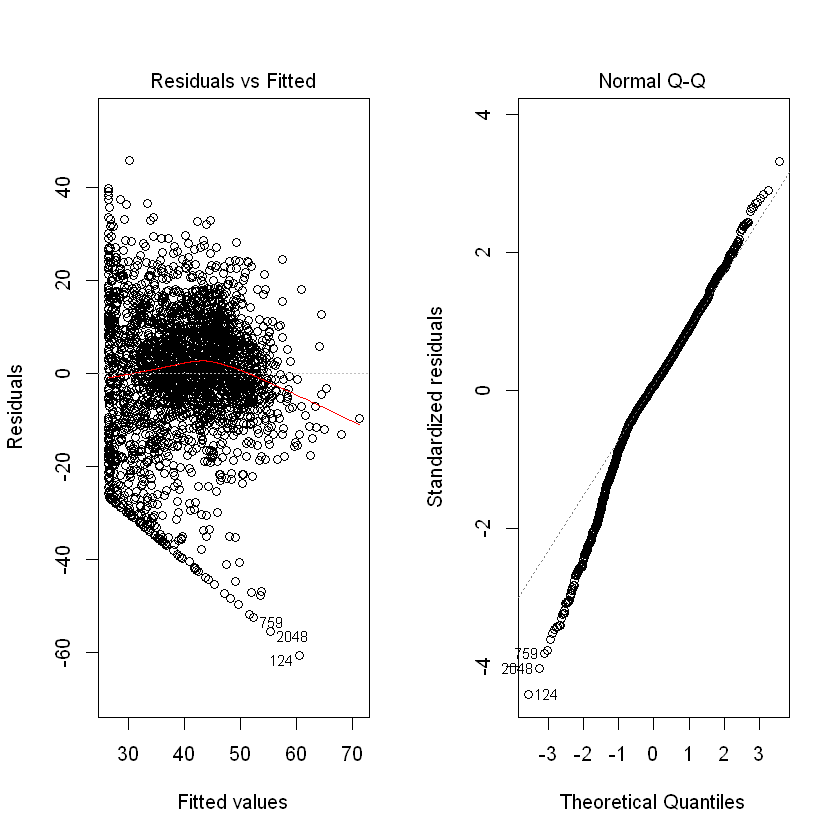

In [28]:
par(mfrow=c(1,2))
plot(lm1_lpoli,which=c(1,2))
par(mfrow=c(1,1))

Decidiamo quindi di aggiornare il modello:

In [29]:
lm4_l <- update(lm2_e, .~.+ loudness + I(loudness^2))
summary(lm4_l)


Call:
lm(formula = popularity ~ acousticness + I(acousticness^2) + 
    energy + loudness + I(loudness^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-54.941  -6.500  -0.601   6.336  59.486 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        91.023755   2.926013  31.108  < 2e-16 ***
acousticness       21.940901   3.202485   6.851 9.07e-12 ***
I(acousticness^2) -62.197596   3.009735 -20.665  < 2e-16 ***
energy            -28.712488   2.630552 -10.915  < 2e-16 ***
loudness            4.305318   0.216958  19.844  < 2e-16 ***
I(loudness^2)       0.130163   0.006378  20.408  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.53 on 2658 degrees of freedom
Multiple R-squared:  0.4829,	Adjusted R-squared:  0.4819 
F-statistic: 496.5 on 5 and 2658 DF,  p-value: < 2.2e-16


Tutti i coefficienti di regressione presentano livelli di significatività elevati, inoltre analizzando i valori del coefficiente di determinazione e dell’$R^{2}$ corretto osserviamo che circa il 48% della variabilità della risposta è spiegata attraverso le variabili esplicative considerate. 

Valutiamo infine la possibilità di introdurre ancora una variabile esplicativa tenendo in considerazione, come prima, il livello di correlazione con la variabile target. Introduciamo separatamente le variabili *Valence* e *Danceability* e valutiamo il loro contributo nel modello tramite il test anova:

In [30]:
lm5_v <- update(lm4_l, .~.+ valence)
summary(lm5_v)

lm5_d <- update(lm4_l, .~.+ danceability)
summary(lm5_d)

anova(lm4_l, lm5_v)
anova(lm4_l, lm5_d)


Call:
lm(formula = popularity ~ acousticness + I(acousticness^2) + 
    energy + loudness + I(loudness^2) + valence)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.079  -6.098  -0.646   6.082  56.362 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        92.566217   2.855916  32.412   <2e-16 ***
acousticness       31.720571   3.230825   9.818   <2e-16 ***
I(acousticness^2) -69.094747   2.992313 -23.091   <2e-16 ***
energy            -22.954601   2.610937  -8.792   <2e-16 ***
loudness            4.116762   0.212142  19.406   <2e-16 ***
I(loudness^2)       0.118962   0.006291  18.910   <2e-16 ***
valence           -14.800581   1.255603 -11.788   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.24 on 2657 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.5075 
F-statistic: 458.4 on 6 and 2657 DF,  p-value: < 2.2e-16



Call:
lm(formula = popularity ~ acousticness + I(acousticness^2) + 
    energy + loudness + I(loudness^2) + danceability)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.927  -6.606  -0.495   6.323  58.303 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        88.118023   3.302914  26.679  < 2e-16 ***
acousticness       21.174426   3.226435   6.563 6.33e-11 ***
I(acousticness^2) -60.959954   3.078495 -19.802  < 2e-16 ***
energy            -27.744225   2.678562 -10.358  < 2e-16 ***
loudness            4.256829   0.218360  19.495  < 2e-16 ***
I(loudness^2)       0.130538   0.006378  20.466  < 2e-16 ***
danceability        3.341466   1.765101   1.893   0.0585 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.52 on 2657 degrees of freedom
Multiple R-squared:  0.4836,	Adjusted R-squared:  0.4824 
F-statistic: 414.7 on 6 and 2657 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2658,353327.5,NA,NA,NA,NA
2657,335768.4,1,17559.05,138.9482,2.683642e-31


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2658,353327.5,NA,NA,NA,NA
2657,352851.6,1,475.9219,3.583729,0.0584566


Come evidenziato dall’output dei modelli e dal test anova, il modello preferibile è quello con la variabile *Valence*: infatti nel modello che considera la variabile *Danceability* si osserva che il coefficiente di regressione associato perde significatività e diminuisce il valore di $R^{2}$. 
Arriviamo ad ottenere un livello di spiegabilità della variabile risposta del 50%.

Rivalutiamo tuttavia la presenza della variabile *Energy* all’interno del modello per essere certi di evitare fenomeni di collinearità:

In [31]:
lm4_rm_e <- update(lm5_v, .~.- energy)
summary(lm4_rm_e)


Call:
lm(formula = popularity ~ acousticness + I(acousticness^2) + 
    loudness + I(loudness^2) + valence)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.891  -6.527  -0.653   6.241  58.592 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        69.922949   1.251656   55.86   <2e-16 ***
acousticness       43.929699   2.958711   14.85   <2e-16 ***
I(acousticness^2) -73.280271   2.996296  -24.46   <2e-16 ***
loudness            3.296599   0.193244   17.06   <2e-16 ***
I(loudness^2)       0.106957   0.006229   17.17   <2e-16 ***
valence           -16.865800   1.251010  -13.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.4 on 2658 degrees of freedom
Multiple R-squared:  0.4943,	Adjusted R-squared:  0.4934 
F-statistic: 519.7 on 5 and 2658 DF,  p-value: < 2.2e-16


Si osserva una diminuzione minima del livello di spiegabilità, che passa dal 50% al 49%, mantenendo alti livelli di significatività dei coefficienti di regressione e un similare valore di $R^{2}$ aggiustato. Decidiamo perciò di escludere la variabile dal modello.

In conclusione verifichiamo che l’inserimento di ulteriori variabili non migliori la performance del modello.

Notiamo che l'introduzione della variabile esplicativa *Danceability* migliora di diversi punti percentuali la spiegabilità della variabile target, raggiungendo il 53%, con livelli di significatività dei coefficienti ancora elevati. 

In ultima analisi riportiamo l’andamento grafico dei residui. 


Call:
lm(formula = popularity ~ acousticness + I(acousticness^2) + 
    loudness + I(loudness^2) + valence + danceability)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.471  -5.720  -0.284   5.578  44.464 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        59.103346   1.401532   42.17   <2e-16 ***
acousticness       38.691405   2.862604   13.52   <2e-16 ***
I(acousticness^2) -66.015320   2.917768  -22.62   <2e-16 ***
loudness            3.187055   0.185716   17.16   <2e-16 ***
I(loudness^2)       0.107177   0.005981   17.92   <2e-16 ***
valence           -29.616523   1.471334  -20.13   <2e-16 ***
danceability       30.263020   2.016152   15.01   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.95 on 2657 degrees of freedom
Multiple R-squared:  0.5338,	Adjusted R-squared:  0.5328 
F-statistic: 507.1 on 6 and 2657 DF,  p-value: < 2.2e-16


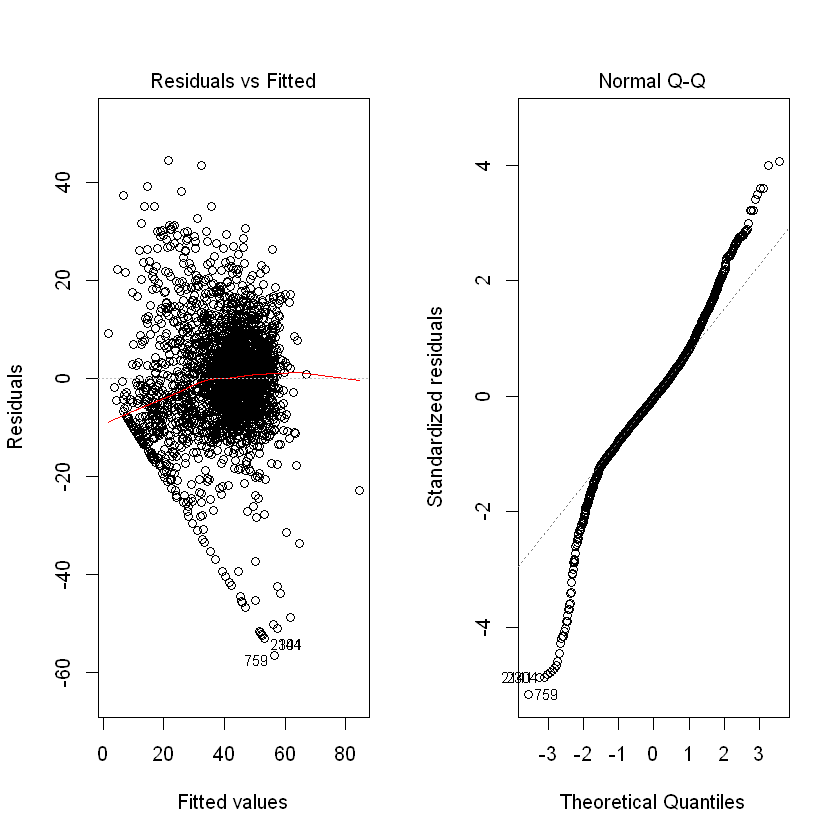

In [32]:
lm6_d <- update(lm4_rm_e, .~.+ danceability)
summary(lm6_d)
par(mfrow=c(1,2))
plot(lm6_d,which=c(1,2))
par(mfrow=c(1,1))

## Conclusioni

Nel tentativo di spiegare l’attributo *Popularity* del dataset Spotify, abbiamo in primo luogo esplorato i dati forniti attraverso un’analisi principalmente grafica volta ad indagare le singole distribuzioni delle variabili e le correlazioni che intercorrono tra esse. 
A partire da tali risultati abbiamo sviluppato un modello di regressione lineare multipla grazie al quale abbiamo spiegato il 53% dei dati.
É interessante notare che tale risultato è stato raggiunto mantenendo un alto livello di significatività di tutte le variabili esplicative coinvolte.

Il modello, nel complesso, può essere eventualmente migliorato attraverso l’introduzione di tecniche di classificazione ipotizzando, ad esempio, che livelli di popolarità bassi o alti di un genere celino dipendenze interne peculiari tra le variabili.